<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 6.2: K-Means bad cases

INSTRUCTIONS:

- Replace the `___` with proper code to run the cells
- Observe and understand the results
- Answer the questions

In [2]:
## Import Libraries

import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

# from sklearn import datasets
from sklearn.datasets import make_circles
import seaborn as sbn

In [3]:
## Create data points (circles)

np.random.seed(42)
X = np.random.randn(100, 2)
# Introduce some outliers
outliers = np.array([[8, 8], [9, 9], [10, 10]])
X = np.vstack([X, outliers])


In [5]:
print(X)

[[ 4.96714153e-01 -1.38264301e-01]
 [ 6.47688538e-01  1.52302986e+00]
 [-2.34153375e-01 -2.34136957e-01]
 [ 1.57921282e+00  7.67434729e-01]
 [-4.69474386e-01  5.42560044e-01]
 [-4.63417693e-01 -4.65729754e-01]
 [ 2.41962272e-01 -1.91328024e+00]
 [-1.72491783e+00 -5.62287529e-01]
 [-1.01283112e+00  3.14247333e-01]
 [-9.08024076e-01 -1.41230370e+00]
 [ 1.46564877e+00 -2.25776300e-01]
 [ 6.75282047e-02 -1.42474819e+00]
 [-5.44382725e-01  1.10922590e-01]
 [-1.15099358e+00  3.75698018e-01]
 [-6.00638690e-01 -2.91693750e-01]
 [-6.01706612e-01  1.85227818e+00]
 [-1.34972247e-02 -1.05771093e+00]
 [ 8.22544912e-01 -1.22084365e+00]
 [ 2.08863595e-01 -1.95967012e+00]
 [-1.32818605e+00  1.96861236e-01]
 [ 7.38466580e-01  1.71368281e-01]
 [-1.15648282e-01 -3.01103696e-01]
 [-1.47852199e+00 -7.19844208e-01]
 [-4.60638771e-01  1.05712223e+00]
 [ 3.43618290e-01 -1.76304016e+00]
 [ 3.24083969e-01 -3.85082280e-01]
 [-6.76922000e-01  6.11676289e-01]
 [ 1.03099952e+00  9.31280119e-01]
 [-8.39217523e-01 -3

In [6]:
print(_)

In [8]:
## Convert data into a DataFrame

# Declare the column names
columns = 'A B'.split()

# Load the dataset as a pandas data frame
X = pd.DataFrame(X, columns = columns)

In [6]:
print(columns)

['A', 'B']


In [7]:
X.head()

,A,B
0,-0.210620,0.246516
1,-0.349708,0.020755
2,0.385541,0.082358
3,1.001604,0.237919
4,0.208312,-0.150387


In [9]:
## Check data

# About X
print('X is a %s' % type(X))
print('X has %d rows and %d columns' % X.shape)
print('Basic Statistics about X%s' % ('_'*50))
print(X.describe())
print('')
print('Sample of X%s' % ('_'*50))
print(X.head())

X is a <class 'pandas.core.frame.DataFrame'>
X has 103 rows and 2 columns
Basic Statistics about X__________________________________________________
                A           B
count  103.000000  103.000000
mean     0.149938    0.295167
std      1.761834    1.812041
min     -2.619745   -1.987569
25%     -0.691039   -0.605709
50%     -0.013497    0.171368
75%      0.417437    0.759684
max     10.000000   10.000000

Sample of X__________________________________________________
          A         B
0  0.496714 -0.138264
1  0.647689  1.523030
2 -0.234153 -0.234137
3  1.579213  0.767435
4 -0.469474  0.542560


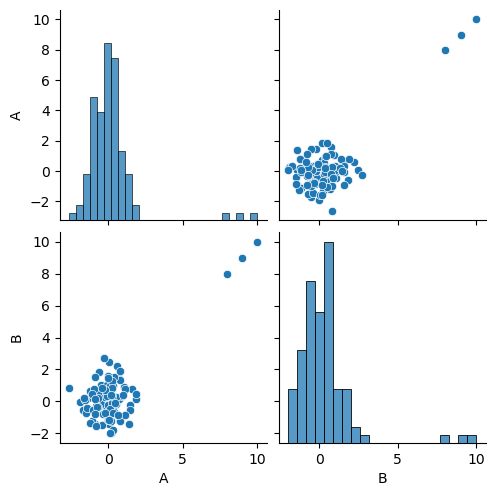

In [10]:
sbn.pairplot(X)
plt.show()

### Question: What are other important things to know about the data? Comment on:
- Types
- Availability
- Dispersion and Distribution

### Question: Which features could/should be used to cluster the data points?

In [10]:
X.describe()

,A,B
count,400.000000,400.000000
mean,0.000115,0.005709
std,0.529212,0.524754
min,-1.086089,-1.058164
25%,-0.286536,-0.291112
50%,-0.006409,0.018730
75%,0.298106,0.289370
max,1.110063,1.072494


In [11]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       400 non-null    float64
 1   B       400 non-null    float64
dtypes: float64(2)
memory usage: 6.4 KB


In [17]:
maxA=X['A'].max()
minA=X['A'].min()
minB=X['B'].min()
maxB=X['B'].max()

print('maxA=',maxA,"minA=", minA,"maxB=",maxB,"minB=",minB)

maxA= 10.0 minA= -2.6197451040897444 maxB= 10.0 minB= -1.9875689146008928


In [20]:
if minA>minB:
    min=minB
else:
    min=minA

if maxA>maxB:
    max=maxB
else:
    mmax=maxA
print(min,max)

-2.6197451040897444 <built-in function max>


In [19]:
## Create some supporting functions



# Create new centroids randomly for all the K clusters including all dimensions
def create_centroids(K, features):
    # start with No centroids
    centroids = []
    # need one centroid for each cluster
    for i in range(K):
        # it can be multi-dimensional
        dimensions = []
        for f in features:
            # create a random number between the minimum and maximum of each feature
            x = np.random.uniform(min,max)
            dimensions.append(x)
        # add all dimensions for the centroids of each cluster
        centroids.append(dimensions)
    return centroids
print(create_centroids(4,X[['A','B']]))

TypeError: float() argument must be a string or a real number, not 'builtin_function_or_method'

In [15]:
# Identify the closest centroid for a given data point
def closest_centroid(x, centroids):
    distances = []
    # convert x to a numpy.array; x contains all the features of a data point
    p = np.array(x)
    for c in centroids:
        # convert c to a numpy.array; c contains the coordinates for all the features
        q = np.array(c)
        # calculate the Euclidean distance between data point `x` and centroid `c`
        d = np.sqrt((p - q) ** 2).sum()
        # add the distance for each centroid
        distances.append(d)

    # return the position (cluster) which has the smallest distance
    return np.array(distances).argmin()

In [37]:
# recalculate all the centroids based on the mean of the members of each cluster
def update_centroid(X, y, centroids):
    c = []
    # for each of the existing centroids
    for i in range(len(centroids)):
        # check if any object was assigned to a cluster
        if X[y == i].shape[0]:
            dimensions = []
            # for all the features
            for f in X.columns:
                # calculate the mean
                x = X[f][y==i].mean()
                dimensions.append(x)
            c.append(dimensions)
        # if a cluster got no members
        else:
            # keep the previous coordinates
            c.append(centroids[i])

    return c

In [35]:
# plot a chart of the data points and centroids either generic or identifying the clusters
# NOTE: for visualisation purposes, only consider the first two features
def plot_data(ax, X, y, centroids, show_clusters = True):
    # unpack the coordinates of the centroids
    a = [z[0] for z in centroids]
    b = [z[1] for z in centroids]

    # show distinct colours if asked to identify the clusters
    if show_clusters:
        colours = 'rgbykcm'
        for i in range(len(centroids)):
            ax.scatter(X[features[0]][y == i], X[features[1]][y == i], c = colours[i], label = 'Cluster %d' % i)
    # show data points without cluster identification
    else:
        ax.scatter(X[features[0]], X[features[1]], label = 'Data Point')

    # label the features
    ax.set_xlabel(features[0])
    ax.set_ylabel(features[1])

    # identify the centroids
    ax.scatter(a, b, c = 'k', linewidths = 5, marker = 'x', label = 'Centroid')
    for i in range(len(a)):
        c = colours[i] if show_clusters else 'k'
        ax.axvline(x = a[i], color = c, linestyle = '--', linewidth = 1)
        ax.axhline(y = b[i], color = c, linestyle = '--', linewidth = 1)

    # create a text to show the centroids' coordinates
    t = '\n'.join(['%d: (%.3f, %.3f)' % (i, a, b) for (i, (a, b)) in enumerate(centroids)])
    ax.text(0.69, -1.1, t)

    ax.legend()

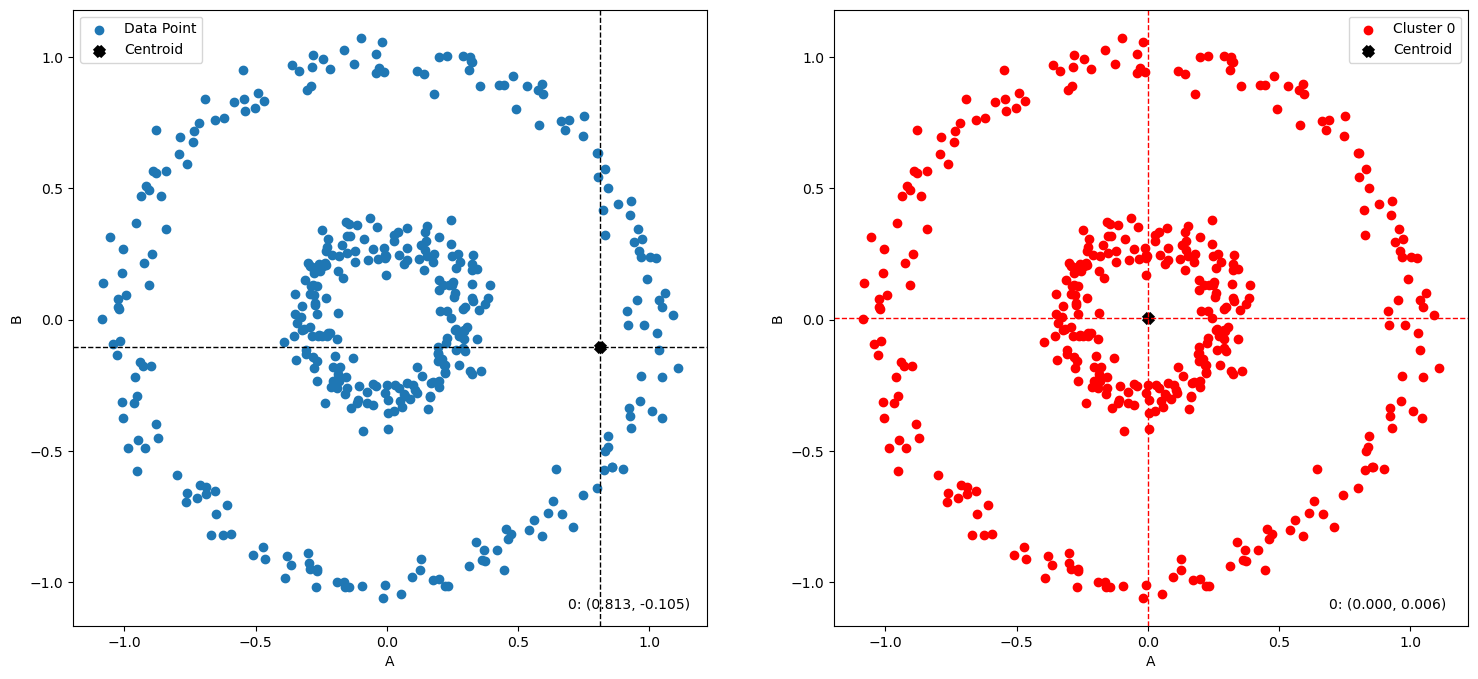

In [38]:
## K_Means
## Note that the comments match the outlined K-Means Algorithm in the presentation

# 1. Define the number of clusters `K`
K = 1 # choose different values for `K`

# list the features to be used
features = ['A', 'B']

# 2. Select `K` cluster centres randomly
centroids = create_centroids(K, features)

# plot the data points and initial centroids (the 'Before')
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (18, 8))
plot_data(axes[0], X[features], None, centroids, False)

# repeat util makes no moves
while True:
    # 3. Calculate the distance between each data point and cluster centres
    # 4. Assign the data point to the cluster whose distance from its centre is minimum
    y = X[features].apply(lambda x: closest_centroid(x, centroids), axis = 1).values
    # move the known assignment be the previous state, for post comparison
    old_c = centroids.copy()

    # 5. Recalculate all new cluster centres by averaging the objects of each cluster
    centroids = update_centroid(X[features], y, centroids)

    # 6. Repeat steps 3 to 5 until the centroids do not change
    if old_c == centroids:
        break

# plot the data points identified by cluster and final centroids (the 'After')
plot_data(axes[1], X[features], y, centroids)
plt.show()

In [ ]:
while True: # 3. Calculate the distance between each data point and cluster centers # 4. Assign the data point to the cluster whose distance from its center is minimum y = X[features].apply(lambda x: closest_centroid(x, centroids), axis=1).values # If this is not the first iteration, calculate the number of assignment changes if previous_assignments is not None: changes = np.sum(previous_assignments != y) assignment_changes.append(changes) print(f"Iteration {len(assignment_changes)}: {changes} points changed clusters.") # Store the current assignments for the next iteration's comparison previous_assignments = y.copy() # Move the known assignment to the previous state for post comparison old_c = centroids.copy() # 5. Recalculate all new cluster centers by averaging the objects of each cluster centroids = update_centroid(X[features], y, centroids) centroids_list.append(centroids) # 6. Repeat steps 3 to 5 until the centroids do not change or until no assignments change if np.array_equal(old_c, centroids): break

### Question: What happens if the algorithm is run multiple times?
### Question: What happens if `K` is changed?

>

>

>



---



---



> > > > > > > > > © 2024 Institute of Data


---



---



